## Metrics per Age group


In [98]:
import pandas as pd 
import os
import sys
sys.path.append('/home/juandres/aml/CheXBias/src/')
from general_functions import *
import general_functions as gf
import seaborn as sns
import matplotlib.pyplot as plt

### Iterate over all groups

In [26]:
# Path tho results
path_to_groups = '/home/juandres/aml/CheXBias/reports/Experiment_2/age'

# List all groups
all_groups = os.listdir(path_to_groups)

# Age groups
age_groups = [[0,20],[20,40],[40,60],[60,80],[80,100]]

# All metrics
all_metrics = pd.DataFrame()

# Iterate over all groups
for group in all_groups:

    # Load predictions
    predictions1 = pd.read_csv(os.path.join(path_to_groups,group,'predictions.csv'))
    predictions_metadata = predictions1['name'].str.split('_',n=8,expand=True)
    predictions_metadata.columns = ['Patient','study','view','perspective','sex','age','perspective1','ap_pa']
    predictions = pd.concat([predictions1,predictions_metadata], axis=1)

    # Convert age to number
    predictions['age'] = predictions['age'].astype(int)

    # Load GT
    gt = pd.read_csv(os.path.join(path_to_groups,group,'ground_truth.csv'))
    gt_metadata = gt['name'].str.split('_',n=8,expand=True)
    gt_metadata.columns = ['Patient','study','view','perspective','sex','age','perspective1','ap_pa']
    gt = pd.concat([gt,gt_metadata], axis=1)

    # Convert age to number
    gt['age'] = gt['age'].astype(int)

    # Save all metrics
        
    # Group by age 
    for j,age_group in enumerate(age_groups):

        # Predictions
        predictions_age_group = predictions[(predictions['age'] >= age_group[0]) & (predictions['age'] < age_group[1])]
        
        # Filter dataframes
        gt_age_group = gt[(gt['age'] >= age_group[0]) & (gt['age'] < age_group[1])]

        # Convert to pd to numpy      
        pred_age_group_matrix = predictions_age_group[predictions1.columns[1:]].to_numpy()   
        gt_age_group_matrix = gt_age_group[predictions1.columns[1:]].to_numpy()

        # Get metrics
        acc, prec, rec,f1 = calculate_metrics(torch.from_numpy(gt_age_group_matrix), torch.from_numpy(pred_age_group_matrix))

        # Create result as df
        data = {'train_group' : [group], 'test_group' : [j]}

        # Save metric for each classs
        for i,class_name in enumerate(predictions1.columns[1:]):
            data[class_name] = prec[i].item()

        all_metrics = pd.concat([all_metrics,pd.DataFrame(data)],ignore_index=True)
    

In [32]:
# Assuming df is your DataFrame

# Melt the DataFrame to make it suitable for Seaborn's pointplot
#df_melted = all_metrics.melt(id_vars=['train_group', 'test_group'], var_name='Condition', value_name='Value')
#
## Create a pointplot
#plt.figure(figsize=(15, 8))
#sns.pointplot(x='test_group', y='Value', hue='Condition', data=df_melted, ci=None, markers="o", linestyles='-', dodge=True)
#
## Add labels and title
#plt.xlabel('Test Group')
#plt.ylabel('Value')
#plt.title('Analysis of Conditions in Different Test Groups')
#
## Show the plot
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#plt.show()


In [35]:

# Assuming df is your DataFrame

# Melt the DataFrame to make it suitable for Seaborn's pointplot
#df_melted = all_metrics.melt(id_vars=['train_group', 'test_group'], var_name='Condition', value_name='Value')
#
## Set the style of seaborn
#sns.set(style="whitegrid")
#
## Create a FacetGrid with one plot for each train_group
#g = sns.FacetGrid(df_melted, col='train_group', col_wrap=3, height=5, sharey=False)
#g.map(sns.pointplot, 'test_group', 'Value', 'Condition', ci=None, markers="o", linestyles='-', dodge=True)
#
## Add labels and title
#g.set_axis_labels('Test Group', 'Value')
#g.fig.suptitle('Analysis of Conditions in Different Test Groups by Train Group', y=1.02)
#
## Show the plot
#plt.show()


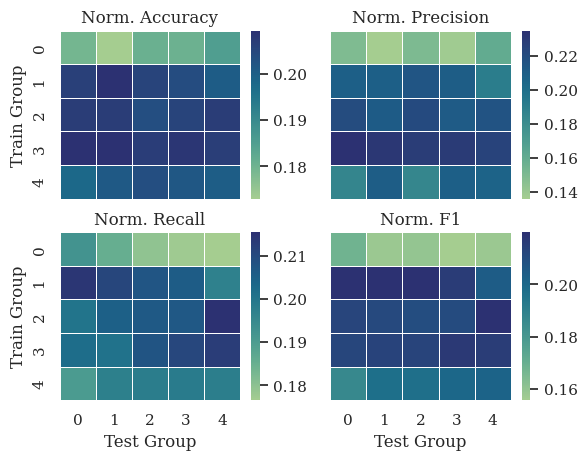

In [133]:
# Path tho results
fig,ax = plt.subplots(2,2)
grid = 0
metrics_names = ['Accuracy','Precision','Recall','F1']
for i in range(0,2):
    for k in range(0,2):

        path_to_groups = '/home/juandres/aml/CheXBias/reports/Experiment_2/age'

        # List all groups
        all_groups = os.listdir(path_to_groups)
        all_groups.sort()

        # Age groups
        age_groups = [[0,20],[20,40],[40,60],[60,80],[80,100]]

        # All metrics
        all_metrics = pd.DataFrame()

        # Iterate over all groups
        for group in all_groups:

            # Load predictions
            predictions1 = pd.read_csv(os.path.join(path_to_groups,group,'predictions.csv'))
            predictions_metadata = predictions1['name'].str.split('_',n=8,expand=True)
            predictions_metadata.columns = ['Patient','study','view','perspective','sex','age','perspective1','ap_pa']
            predictions = pd.concat([predictions1,predictions_metadata], axis=1)

            # Convert age to number
            predictions['age'] = predictions['age'].astype(int)

            # Load GT
            gt = pd.read_csv(os.path.join(path_to_groups,group,'ground_truth.csv'))
            gt_metadata = gt['name'].str.split('_',n=8,expand=True)
            gt_metadata.columns = ['Patient','study','view','perspective','sex','age','perspective1','ap_pa']
            gt = pd.concat([gt,gt_metadata], axis=1)

            # Convert age to number
            gt['age'] = gt['age'].astype(int)

            # Save all metrics
                
            # Group by age 
            for j,age_group in enumerate(age_groups):

                # Predictions
                predictions_age_group = predictions[(predictions['age'] >= age_group[0]) & (predictions['age'] < age_group[1])]
                
                # Filter dataframes
                gt_age_group = gt[(gt['age'] >= age_group[0]) & (gt['age'] < age_group[1])]

                # Convert to pd to numpy      
                pred_age_group_matrix = predictions_age_group[predictions1.columns[1:]].to_numpy()   
                gt_age_group_matrix = gt_age_group[predictions1.columns[1:]].to_numpy()

                # Get metrics
                all_metrics_output = calculate_metrics(torch.from_numpy(gt_age_group_matrix), torch.from_numpy(pred_age_group_matrix))

                # Create result as df
                data = {'train_group' : [group], 'test_group' : [j], 'metric' : [all_metrics_output[grid].mean().item()]}

                ## Save metric for each classs
                #for i,class_name in enumerate(predictions1.columns[1:]):
                #    data[class_name] = acc[i].item()

                all_metrics = pd.concat([all_metrics,pd.DataFrame(data)],ignore_index=True)


        all_metrics['train_group'] = all_metrics['train_group'].str.split('_').str[2]
        all_metrics['train_group'].astype(int)
        all_metrics['test_group'].astype(int)        

        heatmap_data = all_metrics.pivot(index='train_group', columns='test_group', values='metric')
        normalized_data = heatmap_data.apply(lambda x: x / x.sum(), axis=0)
        #plt.figure(figsize=(4, 3))
        sns.heatmap(normalized_data, cmap='crest', fmt=".3f", linewidths=.5,ax=ax[i,k])
        ax[i,k].set_title('Norm. '+metrics_names[grid])  
        ax[i,k].set_xlabel('')
        ax[i,k].set_ylabel('')
        if grid == 0 or grid == 2:
            ax[i,k].set_ylabel('Train Group')
        if grid == 2 or grid == 3:
            ax[i,k].set_xlabel('Test Group')

        if grid == 0 or grid == 1:
            ax[i,k].set_xticks([], minor=False)
        elif grid == 1 or grid == 3:
            ax[i,k].set_yticks([], minor=False)
        if grid == 1:
            ax[i,k].set_yticks([], minor=False)
        
        #cbar = ax[i,k].collections[0].colorbar
        #cbar.set_ticks(cbar.get_ticks())
        #cbar.ax.set_yticklabels(cbar.ax.get_yticklabels(),fontsize=8)

        grid += 1
